<a href="https://colab.research.google.com/github/NLohithReddy/featureimportance-hospitalmanagement/blob/main/feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import seaborn as sns #for plotting
import os

In [ ]:
df = pd.read_csv("/content/HospInfo.csv")
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [ ]:
nrows = df.shape[0]
num_unique_hosp = df['Provider ID'].nunique()
print("Is Provider ID a unique identifier?: {0}".format(nrows == num_unique_hosp))

Is Provider ID a unique identifier?: True


In [ ]:
#Replace text with NaN that can be read as true missing value in Python
df = df.replace('Not Available', np.nan )

#Drop all columns whose name contains 'footnote'
cols_to_drop = list(df.filter(regex='footnote'))
df_clean = df[df.columns.drop(cols_to_drop)]

#print to see results
df_clean.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,True,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,Same as the national average,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,True,4,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,NaN,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,NaN,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,True,3,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [ ]:
#normalize = True gives the percentages of each value instead of frequencies
df_clean['Timeliness of care national comparison'].value_counts(normalize=True)

Same as the national average    0.437589
Above the national average      0.285663
Below the national average      0.276748
Name: Timeliness of care national comparison, dtype: float64

In [ ]:
print("Out of {0} total hospitals, how many have below average wait times?\
 {1} hospitals".format(nrows, round(nrows * 0.255)))

Out of 4812 total hospitals, how many have below average wait times? 1227 hospitals


In [ ]:
df_clean.isnull().mean().sort_values(ascending=False)

Safety of care national comparison                      0.441745
Efficient use of medical imaging national comparison    0.415361
Patient experience national comparison                  0.282654
Mortality national comparison                           0.271944
Timeliness of care national comparison                  0.267503
Effectiveness of care national comparison               0.257053
Hospital overall rating                                 0.253135
Readmission national comparison                         0.203762
Meets criteria for meaningful use of EHRs               0.026646
County Name                                             0.003657
Location                                                0.000261
Provider ID                                             0.000000
Hospital Name                                           0.000000
Hospital Ownership                                      0.000000
Hospital Type                                           0.000000
Phone Number             

In [ ]:
#store the number of rows before (b) dropping
num_rows_b = df_clean.shape[0]

df_clean = df_clean.loc[df_clean["Timeliness of care national comparison"].notnull(), :]

#check if there is no missnig data in target variable
print("% of missing data in target variable after cleaning: {:.0%}"\
      .format(df_clean["Timeliness of care national comparison"].isnull().mean()))

#store the number of rows after (a) dropping
num_rows_a = df_clean.shape[0]

#Show the change in number of rows
print("# of rows before dropping NAs: {0}\n# of rows after dropping NAs: {1}"\
      .format(num_rows_b, num_rows_a))

% of missing data in target variable after cleaning: 0%
# of rows before dropping NAs: 4812
# of rows after dropping NAs: 3546


In [ ]:
#Remove Hospital Name, Address, City, State, Zip Code, County Name, Phone Number, and Location
#Keep Provider ID for key later on so that we could pull in other information if we want to.
df_clean = df_clean.drop([
    "Hospital Name", "Address", "City",
    "State", "ZIP Code", "Phone Number",
    "County Name", "Location"
], axis =1)

#See if values that are categorical are truly categorical, bools as truly bool and int as ints
df_clean.dtypes

Provider ID                                              int64
Hospital Type                                           object
Hospital Ownership                                      object
Emergency Services                                        bool
Meets criteria for meaningful use of EHRs               object
Hospital overall rating                                 object
Mortality national comparison                           object
Safety of care national comparison                      object
Readmission national comparison                         object
Patient experience national comparison                  object
Effectiveness of care national comparison               object
Timeliness of care national comparison                  object
Efficient use of medical imaging national comparison    object
dtype: object

In [ ]:
#Categorical variables are correctly casted as object type
#Emergency Services is bool but Meets criteria for meaningful use of EHR is not. Let's convert this to bool
df_clean['Meets criteria for meaningful use of EHRs'] = \
df_clean['Meets criteria for meaningful use of EHRs'].astype(bool)

#hospital overall rating should be numerical type (int doesn't accept missing values, so conver to float type)
df_clean['Hospital overall rating'] = df_clean['Hospital overall rating'].astype(float)

df_clean.dtypes

Provider ID                                               int64
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                         bool
Meets criteria for meaningful use of EHRs                  bool
Hospital overall rating                                 float64
Mortality national comparison                            object
Safety of care national comparison                       object
Readmission national comparison                          object
Patient experience national comparison                   object
Effectiveness of care national comparison                object
Timeliness of care national comparison                   object
Efficient use of medical imaging national comparison     object
dtype: object

In [ ]:
dv = pd.get_dummies(df_clean[['Hospital Type', 'Hospital Ownership']] )
dv.head()

#drop old columns and concatenate new dummy variables
df_clean = df_clean.drop(['Hospital Type', 'Hospital Ownership'], axis=1)
df_clean = pd.concat([df_clean, dv], axis=1)

#print head to check results (they're appended to the end)
df_clean.head()

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,True,True,3.0,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,...,0,1,0,0,0,0,0,0,0,0
1,10012,True,True,3.0,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,1,0,0,0,0
2,10032,True,True,4.0,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,Same as the national average,...,0,1,0,0,0,0,0,0,0,0
3,10095,True,True,NaN,NaN,NaN,NaN,NaN,Below the national average,Same as the national average,...,0,0,1,0,0,0,0,0,0,0
4,10131,True,True,3.0,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
ordinal_col = list(df_clean.filter(regex="national comparison"))

#Create customized mapper to factorize variables that are ordinal nature
mapper = {
    'Below the national average' : 0,
    'Same as the national average' : 1,
    'Above the national average' : 2
}
for col in ordinal_col:
    df_clean.loc[:, df_clean.columns == col]= df_clean.loc[:, df_clean.columns == col].replace(mapper)

#print results.
df_clean.head()

<ipython-input-12-074d3270518a>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, df_clean.columns == col]= df_clean.loc[:, df_clean.columns == col].replace(mapper)


,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,True,True,3.0,0.0,1.0,2.0,1.0,1.0,2,...,0,1,0,0,0,0,0,0,0,0
1,10012,True,True,3.0,0.0,1.0,1.0,1.0,1.0,2,...,0,0,0,0,0,1,0,0,0,0
2,10032,True,True,4.0,1.0,NaN,1.0,NaN,1.0,1,...,0,1,0,0,0,0,0,0,0,0
3,10095,True,True,NaN,NaN,NaN,NaN,NaN,0.0,1,...,0,0,1,0,0,0,0,0,0,0
4,10131,True,True,3.0,0.0,2.0,1.0,1.0,1.0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Factorize Emergency and Meets criteria for meaningful use of EHRs into booleans
    #true = 1 and False = 0
bool_cols = ['Emergency Services', 'Meets criteria for meaningful use of EHRs']

df_clean[bool_cols] = (df_clean[bool_cols] == True).astype(int)

#print head to see results
df_clean.head()

,Provider ID,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,Hospital Ownership_Government - Federal,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private
0,10005,1,1,3.0,0.0,1.0,2.0,1.0,1.0,2,...,0,1,0,0,0,0,0,0,0,0
1,10012,1,1,3.0,0.0,1.0,1.0,1.0,1.0,2,...,0,0,0,0,0,1,0,0,0,0
2,10032,1,1,4.0,1.0,NaN,1.0,NaN,1.0,1,...,0,1,0,0,0,0,0,0,0,0
3,10095,1,1,NaN,NaN,NaN,NaN,NaN,0.0,1,...,0,0,1,0,0,0,0,0,0,0
4,10131,1,1,3.0,0.0,2.0,1.0,1.0,1.0,1,...,0,0,0,0,0,1,0,0,0,0


# **using Machine learning**

In [ ]:
y

0       2
1       2
2       1
3       1
4       1
       ..
4806    0
4807    1
4809    1
4810    2
4811    1
Name: Timeliness of care national comparison, Length: 3546, dtype: int64

In [ ]:
y = df_clean.pop("Timeliness of care national comparison")
X = df_clean

#randomly split into training and testing data. Let's aside 20% of our data for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Compare dimensions:
#Remember that after we dropped rows from earlier, there were 3,546 rows
print("Original X: {0}, Original y: {1}".format(X.shape, y.shape))
print("X Train: {0}, y train: {1}".format(X_train.shape, y_train.shape))
print("X Train: {0}, y test: {1}".format(X_test.shape, y_test.shape))

Original X: (3546, 22), Original y: (3546,)
X Train: (2836, 22), y train: (2836,)
X Train: (710, 22), y test: (710,)


In [ ]:
X_train_id = X_train.pop("Provider ID")
X_test_id = X_test.pop("Provider ID")

In [ ]:
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance

#Instantiate XGB classifier model
xgb = XGBClassifier(seed = 123)

# fit model no training data
xgb.fit(X_train, y_train)

#Predict the lables of the test test
preds = xgb.predict(X_test)

# Compute the accuracy: accuracy

accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 51.41%


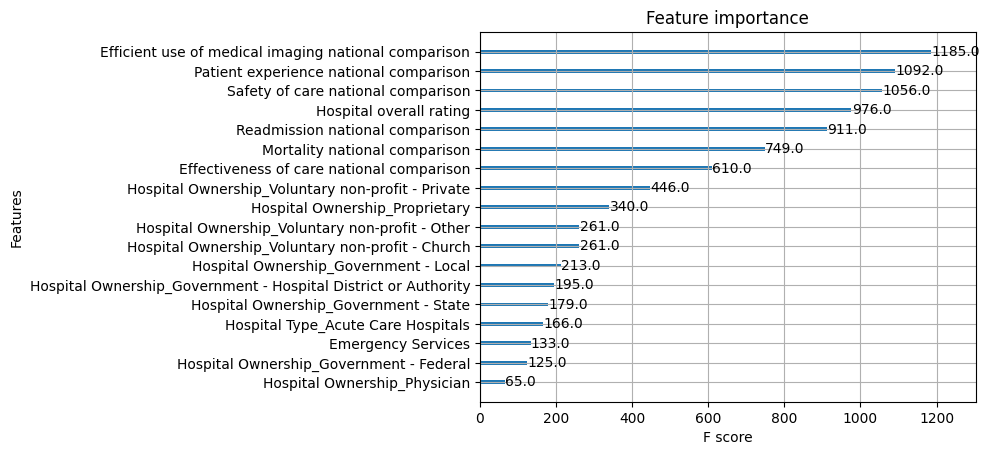

In [ ]:
plot_importance(xgb)
plt.show()